Diego Escobedo

# 6.S083 / 18.S190 Problem set 2: Probability and modelling recovery

## Submission deadline: 11:59pm on Tuesday, April 14


In this problem set we will look at probability distributions and how to model recovery from an infection.

Note: If you are unable to get `Interact.jl` to work to create interactive visualizations, note this fact on your pset submission. Where it says to create an interactive visualization, instead write a function that creates one of the plots, and run that function for different parameter values manually, showing the resulting plots.

Similarly, if you have problems running simulations for larger values of the parameters, just do what you can and make a note.

## Exercise 1: Frequencies

In this exercise we will write a more general function to
count occurrences of values in a set of data. In class we used
as `Vector`, but that is difficult to use with data that jumps around a lot.

1. Write a function `counts` that accepts a vector `data` and calculates the number of times each value in `data` occurs.

    To do so, use a **dictionary** called `counts`.  
    A dictionary maps a **key** to a **value**.
    We want to map integers to integers, so we create an empty dictionary with

    ```jl
    d = Dict{Int, Int}()
    ```

    Use the `haskey` function to find out whether the `Dict` contains a given key or not.

    Use indexing to add a new (key, value) pair, or to retrieve a value:

    ```jl
    d[3] = 1
    d[3]
    ```

    The function should return the dictionary.

In [1]:
function counts(data)
    counts = Dict()
    for elem in data     
        if haskey(counts,elem)
            counts[elem] += 1
        else
            counts[elem] = 1
        end
    end
    return counts
end

counts (generic function with 1 method)

2. Test that your code is correct by applying it to obtain the counts of the data vector `vv = [1, 0, 1, 0, 1000, 1, 1, 1000]`. What should the result be?

In [2]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]
freq_dic = counts(vv)

Dict{Any,Any} with 3 entries:
  0    => 2
  1000 => 2
  1    => 4

The dictionary contains the information as a sequence of **pairs** mapping keys to values. This is not a particularly useful form for us. Instead we would prefer a vector of the keys and a vector of the values, sorted in order of the key.

Make a new version of the `counts` function where you do the following (below). Start off by just running the following commands each in their own cell on the dictionary you got by running the previous `counts` function on the vector `vv` so that you see the result of running each command. Once you have understood what's happening at *each* step, add them to the `counts` function in a new cell.

3. Extract vectors `ks` of keys and `vs` of values using the `keys()` and `values()` functions and convert the results into a vector using the `collect` function.

In [3]:
ks = keys(freq_dic)
vs = values(freq_dic)
ks_vec = collect(ks)
vs_vec = collect(vs)

3-element Array{Any,1}:
 2
 2
 4

4. Define a variable `p` as the result of running the `sortperm` on the keys. This gives a **permutation** that tells you in which order you need to take the keys to give a sorted version.

In [4]:
p = sortperm(ks_vec)

3-element Array{Int64,1}:
 1
 3
 2

5. Use indexing `ks[p]` to return the sorted keys and values vectors.  

    [Here we are passing in a *vector* as the index. Julia extracts the values at the indices given in that vector]

In [5]:
ks_vec[p]
vs_vec[p]

3-element Array{Any,1}:
 2
 4
 2

6. Test that your new `counts` function gives the correct result for the vector `v` by comparing it to the true result (that you get by doing the counting by hand!)

In [6]:
function counts(data)
    counts = Dict()
    for elem in data     
        if haskey(counts,elem)
            counts[elem] += 1
        else
            counts[elem] = 1
        end
    end
    ks = collect(keys(counts))
    vs = collect(values(counts))
    p = sortperm(ks)
    return ks[p], vs[p]
end

counts (generic function with 1 method)

7. Make a function `probability_distribution` that normalizes the result of `counts` to calculate the relative frequency, i.e. to give a probability distribution (i.e. such that the sum of the resulting vector is 1).

    The function should return the keys (the unique data that was in the original data set, as calculated in `counts`, and the probabilities (relative frequencies).

    Test that it gives the correct result for the vector `vv`.

    We will use this function in the rest of the exercises.

In [7]:
function probability_distribution(data)
    ks, vs = counts(data)
    tot = sum(vs)
    probs = vs./tot
    return ks, probs
end

probability_distribution (generic function with 1 method)

### Exercise 2: Modelling recovery

In this exercise, we will investigate the simple model of recovery from an infection that was described in lectures. We
want to study the time $\tau$ to recover.

In this model, an individual who is infected has probability $p$ to recover each day. If they recover on day $n$ then $\tau = n$.
We see that $\tau$ is a random variable, so we need to study its **probability distribution**.

1. Define the function `bernoulli(p)` from lectures. Recall that this generates `true` with probability $p$ and `false` with probability $(1 - p)$.

In [8]:
function bernoulli(p)
     if rand() < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

2. Write a function `geometric(p)`. This should run a simulation with probability $p$ to recover and wait *until* the individual recovers, at which point it returns the time taken to recover.

In [9]:
function geometric(p)
    i = 0
    cured = false
    while !cured
        if bernoulli(p)
            cured = true
        end
        i += 1
    end
    return i
end

geometric (generic function with 1 method)

3. Write a function `experiment(p, N)` that runs the function from [2] `N` times and collects the results into a vector.

In [10]:
function experiment(p,N)
    trials = [geometric(p) for i in 1:N]
    return probability_distribution(trials)
end

experiment (generic function with 1 method)

In [11]:
function experiment_raw(p,N)
    trials = [geometric(p) for i in 1:N]
    return counts(trials)
end

experiment_raw (generic function with 1 method)

4. Run an experiment with $p=0.25$ and $N=10,000$. Plot the resulting probability distribution, i.e. plot $P(\tau = n)$ against $n$, where $n$ is the recovery time.

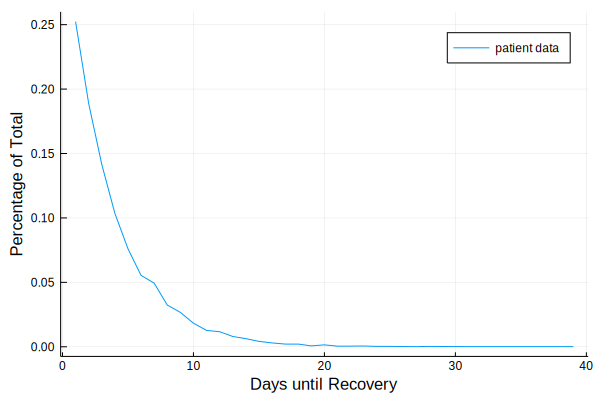

In [12]:
using Plots
N = 10000
p = 0.25
recov,distr = experiment(p,N)
plot(recov,distr, label = "patient data" )
xlabel!("Days until Recovery")
ylabel!("Percentage of Total")

5. Calculate the mean recovery time and add it to the plot using the `vline!()` function and the `ls=:dash` argument to make a dashed line.

Note that `vline!` requires a *vector* of values where you wish to draw vertical lines.

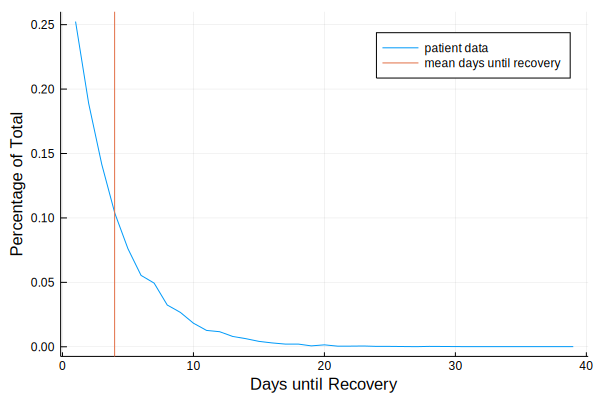

In [13]:
raw_vec = distr.*N
tot_days = 0
mean = sum(raw_vec.*recov)/N
vline!([mean], label = "mean days until recovery")

6. What shape does the distribution seem to have? Can you verify that by using one or more log scales?

It seems to have an exponential distribution. We can verify this by making the Y scale a log scale:

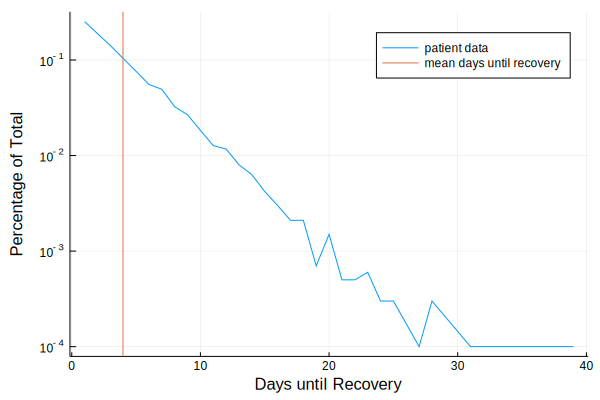

In [14]:
plot!(yscale=:log10)

7. Write an interactive visualization that repeats [4] for $p$ varying between $0$ and $1$ and $N$ between $0$ and $100,000$.

    As you vary $p$, what do you observe? Does that make sense?

    Note that you can make a range for $p$ using something like `0:0.01:1.0`, and you can make a `@manipulate` with additional sliders using a double `for` loop: `for a in 1:10, b in 1:10`.

In [15]:
using Interact
@manipulate for a in 0:0.01:1.0, b in 0:1000:100000
    N = b
    p = a
    recov,distr = experiment(p,N)
    plot(recov,distr, label = "patient data" )
    xlabel!("Days until Recovery")
    ylabel!("Percentage of Total")
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10107583793061367417\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8972898988886312758\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10107583793061367417\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\2000d\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\2000d\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\2000d\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\2000d\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\2000d\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000003d83e850, Task (runnable) @0x000000003d83e850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0

8. Fix $N = 10,000$ and calculate the *mean* time $\langle \tau(p) \rangle$ to recover. Plot this as a function of $p$.
Can you find the relationship between the two quantities?

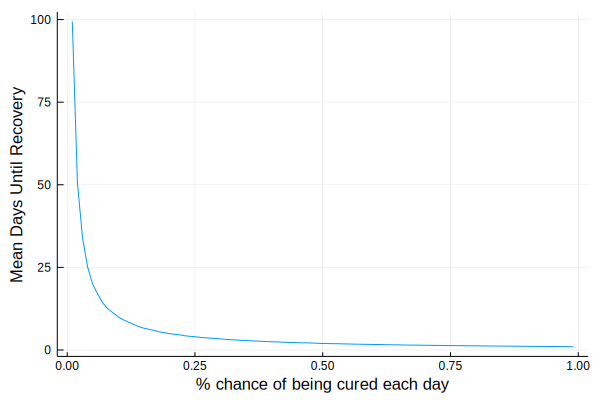

In [16]:
N = 10000
p_range = collect(0.01:0.01:0.99)
mean_time = []
for p in p_range
    days,num_patients = experiment_raw(p,N)
    mean = sum(days.*num_patients)/N
    push!(mean_time,mean)
end
plot(p_range,mean_time, legend=:none)
xlabel!("% chance of being cured each day")
ylabel!("Mean Days Until Recovery")

### Exercise 3: More efficient geometric distributions

Let's use the notation $P_n := \mathbb{P}(\tau = n)$ for the probability to recover on the $n$th step.

Probability theory tells us that in the limit of an infinite number of trials, we have the exact results $P_1 = p$, that $P_2 = p (1-p)$, and in general $P_n = p (1 - p)^{n-1}$.

1. Fix $p = 0.25$. Make a vector of the values $P_n$ for $n=1, \dots, 50$. You must use a loop or similar construction; do *not* do this by hand!

In [17]:
p = 0.25
Pₙ = [p*(1-p)^(n-1) for n in 1:50];

2. Plot $P_n$ as a function of $n$. Compare it to the result from the previous exercise (i.e. plot them both on the same graph).

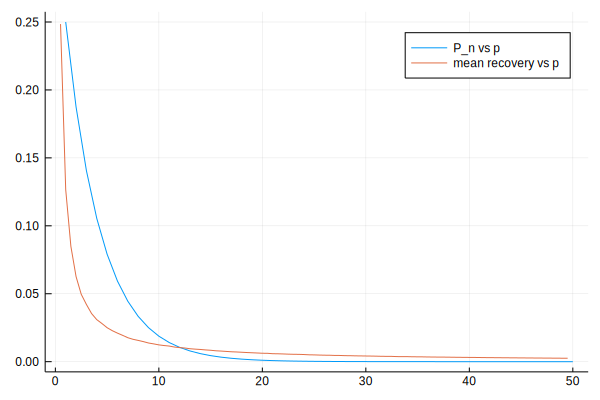

In [18]:
plot(1:50,Pₙ, label = "P_n vs p")
plot!(p_range.*50,mean_time./400, label= "mean recovery vs p")

   3. To draw this picture, we need to add up the lengths of the lines from 1 to $n$ for each $n$, i.e. calculate the **cumulative sum**. Write a function `cumulative_sum`, which returns a new vector. (Of course, you should only do this for a finite number of values! Say those that you found in [2]. )
   
       How could we measure the *error*, i.e. the distance between the two graphs? What do you think determines it? 
       
       If $p$ is *small*, say $p=0.001$, then the algorithm we used in Exercise 2 to sample from geometric distribution will be very slow, since it just sits there calculating a lot of `false`s! (The average amount of time taken is what you hopefully found in [1.8]) 
       
       Let's make a better algorithm. Think of each probability $P_n$ as a "bin" of length $P_n$. If we lay those bins next to each other starting from $P_1$ on the left, then $P_2$, etc., there will be an *infinite* number of bins filling up the interval between $0$ and $1$. (In principle there is no upper limit on how many days it will take to recover, although the probability becomes *very* small.) 
       
       Now suppose we take a uniform random number $r$ between $0$ and $1$. That will fall into one of the bins. If it falls into the bin corresponding to $P_n$, then we return $n$ as the recovery time! 
    

In [19]:
function cumulative_sum(v)
    ret = cumsum(v)
    return ret
end

cumulative_sum (generic function with 1 method)

4. Plot the resulting values on a horizontal line. Generate a few random points and plot those. Convince yourself that the probability that a point hits a bin is equal to the length of that bin.

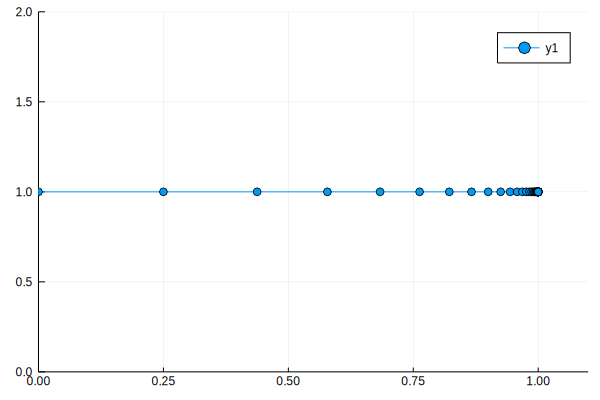

In [20]:
cu = cumulative_sum(Pₙ)
pushfirst!(cu, 0)
plot(cu,[1 for i in 1:length(cu)], marker=:o)
xlims!(0,1.1)
ylims!(0,2)

5. Calculate analytically the sum of $P_1$ up to $P_n$. (Hint: This should be a calculation that you did in high school or in Calculus I.)

$$\sum_{i=1}^n p(1-p)^{i-1} = p \sum_{i=1}^n (1-p)^{i-1} = 1-(1-p)^n $$

6. Use the result of [5] to find analytically which bin $n$ a given value of $r \in [0, 1]$ falls into using the inequality $P_{n-1} \le r \le P_n$.

For this, we have to solve the two inequalities. We start with the less than:

$$ r \leq 1-(1-p)^n$$
$$ (1-p)^n \leq 1-r$$
$$ n \geq \frac{log(1-r)}{log(1-p)}$$

And then go to the greater than:
$$ r \geq 1-(1-p)^(n-1)$$
$$ (1-p)^(n-1) \geq 1-r$$
$$ (n-1)log(1-p) \geq log(1-r)$$
$$ n-1 \leq \frac{log(1-r)}{log(1-p)}$$
$$ n \leq \frac{log(1-r)}{log(1-p)}+1$$

7. Implement this using the `floor` function.

In [21]:
function find_bin(r,p)
    upper_bound = floor(log(1-r)/log(1-p))
    return upper_bound
end

find_bin (generic function with 1 method)

### Exercise 4: A simple infection model

In this exercise we will investigate a *highly* simplified model of the process of infection and recovery.  (In the next problem set we will develop a much better model.)

The model is as follows: An individual starts in state `S` ("susceptible"). When they are in state `S`, they have a probability $p_E$ to become exposed (state `E`) at each step. Once they are exposed, they have probability $p_I$ to become infectious (state `I`). When they are infectious, they have a probability $p_R$ to recover at each step.

Let's denote by $\tau_S$ the length of time spent in state `S`, and similarly for $\tau_E$ and $\tau_I$.

1. How does the total time $\tau_\text{total}$ to go from `S` to `R` relate to these times? What is the relation with the geometric random variables from the previous exercises?

$\tau_\text{total} = \tau_\text{S} + \tau_\text{E} + \tau_\text{I}$

This is the sum of 3 geometric random variables, since all of these have a certain probability of happening at each timestep.

2. Write a function `total_time(p_E, p_I, p_R)` that calculates the total time to go from state `S` to state `R`.

In [22]:
function total_time(p_E, p_I, p_R)
    time_exposed = geometric(p_E)
    time_infected = geometric(p_I)
    time_recovered = geometric(p_R)
    return time_exposed + time_infected + time_recovered
end
function total_time(p, s)
    v = [geometric(p) for i in 1:s]
    return sum(v)
end

total_time (generic function with 2 methods)

3. Run a Monte Carlo simulation to calculate and plot the probability distribution of $\tau_\text{total}$ for $p_E = 0.25$, $p_I = 0.1$ and $p_R = 0.05$.  

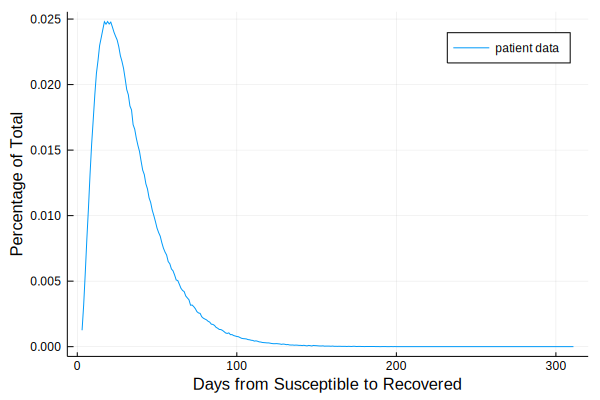

In [23]:
N = 1000000
results = [total_time(0.25,0.1,0.05) for i in 1:N]
recov,distr = probability_distribution(results)
plot(recov,distr, label = "patient data" )
xlabel!("Days from Susceptible to Recovered")
ylabel!("Percentage of Total")

4. What happens to the probability distribution of the total time as you add more states, say `E_1`, `E_2`? You may suppose that the probability to move to the next state is the same value $p$ for all states. How could you use $s$ such states?

    [This is a visual representation of a famous theorem that we will discuss in class.]

In [27]:
@manipulate for bins in 1:50
    N = 100000
    p = 0.25
    s = bins
    results = [total_time(p,s) for i in 1:N]
    recov,distr = probability_distribution(results)
    plot(recov,distr, label = "patient data" )
    xlabel!("Days from Susceptible to Recovered")
    ylabel!("Percentage of Total")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["bins"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
25, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\2000d\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\2000d\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\2000d\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\2000d\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\2000d\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000140676b0, Task (runnable) @0x00000000140676b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\

5. **Extra credit:** Write a simulation that runs $N$ individuals and keeps track at each step of how many people are in which state. Plot the resulting graph of the number of people in the `S`,  `I`, `E` and `R` states as a function of time.

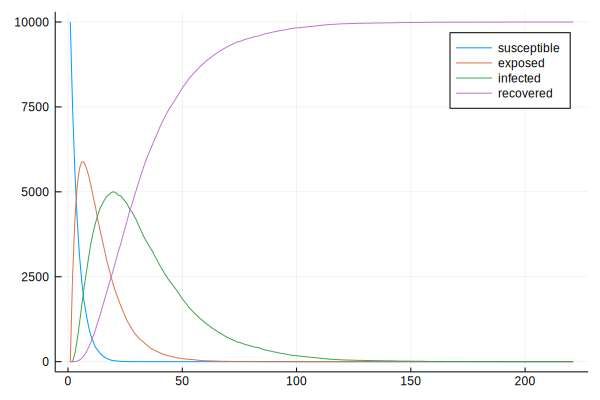

In [32]:
N = 10000
p_E = 0.25
p_I = 0.1 
p_R = 0.05
longitudinal_S = [N]
longitudinal_E = [0]
longitudinal_I = [0]
longitudinal_R = [0]
S = N
E = 0
I = 0
R = 0
while R < N
    susceptible_to_exposed = count([bernoulli(p_E) for i in 1:S])
    exposed_to_infected = count([bernoulli(p_I) for i in 1:E])
    infected_to_recovered = count([bernoulli(p_R) for i in 1:I])
    S -= susceptible_to_exposed
    E += susceptible_to_exposed
    E -= exposed_to_infected
    I += exposed_to_infected
    I -= infected_to_recovered
    R += infected_to_recovered
    push!(longitudinal_S, S)
    push!(longitudinal_E, E)
    push!(longitudinal_I, I)
    push!(longitudinal_R, R)
end
plot(longitudinal_S, label = "susceptible")
plot!(longitudinal_E, label = "exposed")
plot!(longitudinal_I, label = "infected")
plot!(longitudinal_R, label = "recovered")

### Exercise 5: Helping with transcripts

Correct another 10 + 20 lines of the transcripts (see problem set 1 for details) and report which ones you did.

Lecture 4, Lines 511-520